# Solution checker

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks
import scipy

import os
import sys
sys.path.append("../")

from syllable_indices import *
from dynamical_systems import airflow


In [2]:
lam1space = np.linspace(2.5,3.5,50)
folder = "Solutions_subsampled"

In [3]:
n = 24

height_min=0.002
distance=200

## Van der Pol

In [4]:
#n = 24

lam1 = lam1space[n]

with open(f"{folder}/VdP_{n:02}.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]
    print(lam1, soldict["lambda1"])
    
    vsol = np.diff(xsol)
    vsol = np.append(vsol, 0)

dt = tsol[1]-tsol[0]

2.989795918367347 9.989795918367347


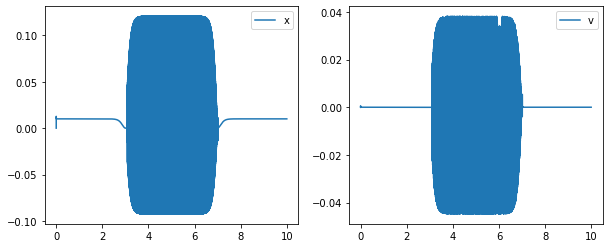

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(tsol, xsol, label="x")
ax[1].plot(tsol, vsol, label="v")

ax[0].legend()
ax[1].legend()

### Spectral analysis

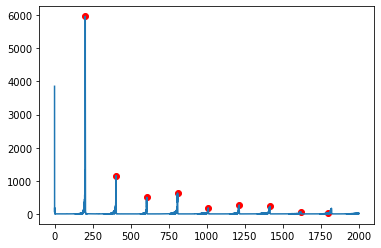

Center 384.4012199385029 -  iRR 0.7687466354993833


In [6]:
xf = fftfreq(len(xsol), dt)[:len(xsol)//2]
yf = fft(xsol)
spectrum = np.abs(yf)[:len(xsol)//2]

freqs, heights = spectrum_peaks(xf,spectrum[:20000], height_min=height_min, distance=distance)

plt.plot(xf[:20000], spectrum[:20000])
plt.scatter(freqs, heights, color="red")
plt.show()

center, roughness, iIRR = measures(freqs, heights)
print("Center", center, "-  iRR", iIRR)

### Envelope analysis

1.3427485819101959 1.3439239712232827


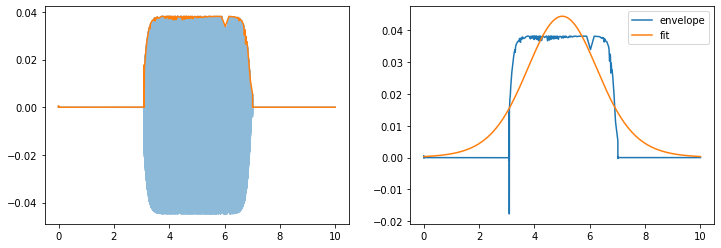

In [7]:
# Find peaks twice
tp = tsol[scipy.signal.find_peaks(vsol,prominence=0.0001)[0]]
vp = vsol[scipy.signal.find_peaks(vsol,prominence=0.0001)[0]]

tpp = tp[scipy.signal.find_peaks(vp)[0]]
vpp = vp[scipy.signal.find_peaks(vp)[0]]

# Get datapoints before and after oscillations
first_index = np.where(tsol == tpp[0])[0][0]
last_index = np.where(tsol == tpp[-1])[0][0]

# Add an datapoints before and after oscillations
tpp = np.append(tsol[:first_index], tpp)
vpp = np.append(vsol[:first_index], vpp)

tp = np.append(tpp, tsol[last_index:])
vp = np.append(vpp, vsol[last_index:])

# Interpolate points:
v_interp = np.interp(tsol, tp, np.abs(vp))

params, _ = scipy.optimize.curve_fit(airflow, tsol, v_interp, p0=None)
lam1 = params[0]
lam2 = params[1]
print(lam1, lam2)

# Plot
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(tsol, vsol, alpha=0.5)
ax[0].plot(tsol, v_interp)

ax[1].plot(tp, vp, label="envelope")
ax[1].plot(tp, airflow(tp, *params), label="fit")

ax[1].legend()
plt.show()

## Hopf

In [8]:
# n = 24

lam1 = lam1space[n]

with open(f"{folder}/Hopf_{n:02}.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]
    print(lam1, soldict["lambda1"])

    vsol = np.diff(xsol)
    vsol = np.append(vsol, 0)
    
dt = tsol[1]-tsol[0]

2.989795918367347 2.989795918367347


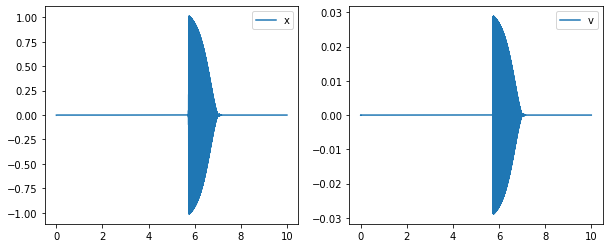

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(tsol, xsol, label="x")
ax[1].plot(tsol, vsol, label="v")

ax[0].legend()
ax[1].legend()

### Spectral analysis

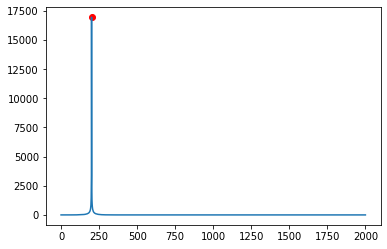

Center 200.49954586739324 -  iRR 0.0


In [10]:
xf = fftfreq(len(xsol), dt)[:len(xsol)//2]
yf = fft(xsol)
spectrum = np.abs(yf)[:len(xsol)//2]

freqs, heights = spectrum_peaks(xf,spectrum[:20000], height_min=height_min, distance=distance)

plt.plot(xf[:20000], spectrum[:20000])
plt.scatter(freqs, heights, color="red")
plt.show()

center, roughness, iIRR = measures(freqs, heights)
print("Center", center, "-  iRR", iIRR)

### Envelope analysis

61.42814885143679 1.661440326283366


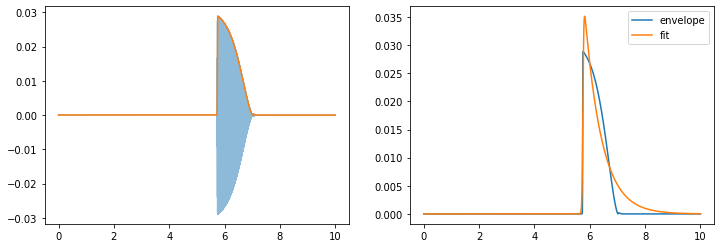

In [11]:
# Find peaks
tp = tsol[scipy.signal.find_peaks(vsol)[0]]
vp = vsol[scipy.signal.find_peaks(vsol)[0]]

# Interpolate points:
v_interp = np.interp(tsol, tp, np.abs(vp))

params, _ = scipy.optimize.curve_fit(airflow, tsol, v_interp, p0=None)
lam1 = params[0]
lam2 = params[1]
print(lam1, lam2)

# Plot
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(tsol, vsol, alpha=0.5)
ax[0].plot(tsol, v_interp)

ax[1].plot(tp, vp, label="envelope")
ax[1].plot(tp, airflow(tp, *params), label="fit")

ax[1].legend()
plt.show()

## SNILC

In [12]:
# n = 24

lam1 = lam1space[n]

with open(f"{folder}/SNILC_{n:02}.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]
    print(lam1, soldict["lambda1"])

    vsol = np.diff(xsol)
    vsol = np.append(vsol, 0)

dt = tsol[1]-tsol[0]

2.989795918367347 9.989795918367347


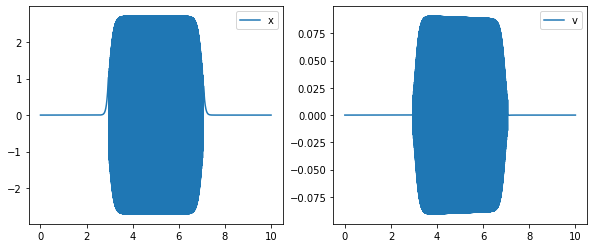

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(tsol, xsol, label="x")
ax[1].plot(tsol, vsol, label="v")

ax[0].legend()
ax[1].legend()

### Spectral analysis

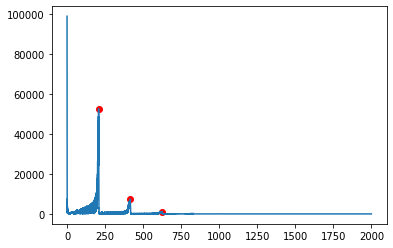

Center 240.68433716829605 -  iRR -1.8799858925586097


In [14]:
xf = fftfreq(len(xsol), dt)[:len(xsol)//2]
yf = fft(xsol)
spectrum = np.abs(yf)[:len(xsol)//2]

freqs, heights = spectrum_peaks(xf,spectrum[:20000], height_min=height_min, distance=distance)

plt.plot(xf[:20000], spectrum[:20000])
plt.scatter(freqs, heights, color="red")
plt.show()

center, roughness, iIRR = measures(freqs, heights)
print("Center", center, "-  iRR", iIRR)

In [15]:
freqs, heights

(array([207.39953024, 415.49905889, 623.59858755]),
 array([52584.87369372,  7451.96513663,  1168.83651158]))

### Envelope calculation

1.1867897851743072 1.1378164459405786


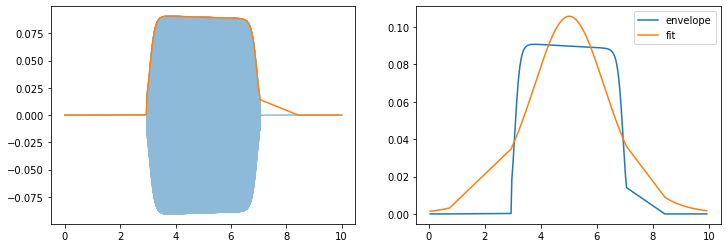

In [16]:
# Find peaks
tp = tsol[scipy.signal.find_peaks(vsol)[0]]
vp = vsol[scipy.signal.find_peaks(vsol)[0]]

# Interpolate points:
v_interp = np.interp(tsol, tp, np.abs(vp))

params, _ = scipy.optimize.curve_fit(airflow, tsol, v_interp, p0=None)
lam1 = params[0]
lam2 = params[1]
print(lam1, lam2)

# Plot
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(tsol, vsol, alpha=0.5)
ax[0].plot(tsol, v_interp)

ax[1].plot(tp, vp, label="envelope")
ax[1].plot(tp, airflow(tp, *params), label="fit")

ax[1].legend()
plt.show()